# Analysis of The A/B Testing of International Online Shop
# Contents <a id='back'></a>

1. Introduction
    
    
2. Data Pra-processing
    * Loading Data
    * Preliminary Exploratory Data
    * Checking Data Quality
    * Remove  `interface_eu_test` from the table of `df_participant`
    * Checking Data Anomalies
    * Checking Missing Values
    * Handling Missing Values
    * Checking Data Duplicate
   
   

3. Exploratory Data Analysis (EDA)


4. A/B Testing


5. Overall Conclusion & Recommendations

## Introduction

- We have received an analytical task from an international online store. Our predecessor failed to complete it: they launched an A/B test and then quit (to start a watermelon farm in Brazil). They left only the technical specifications and the test results; experiment name is recommender_system_test

- Then, we have to rerun the A/B test to testing changes related to the introduction of an improved recommendation system.

## Data Pra-processing <a id='intro'></a>
### Loading Data

In [ ]:
# Load the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import graph_objects as go
from scipy import stats
import math

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading data files into DataFrames
# Optimize the data for analysis purposes, type column object converted into category

df_user = pd.read_csv('final_ab_new_users_upd_us.csv', parse_dates=['first_date'])
df_event = pd.read_excel('final_ab_events_upd_us.xlsx')
df_participant = pd.read_csv('final_ab_participants_upd_us.csv')

- `final_ab_new_users_upd_us.csv` — all users who signed up in the online store from December 7 to 21, 2020
- `final_ab_events_upd_us.csv` — all events of the new users within the period from December 7, 2020 to January 1, 2021
- `final_ab_participants_upd_us.csv` - a table containing the list of experiment participants

Structure of `final_ab_new_users_upd_us.csv`:

- `user_id`
- `first_date` — sign-up date
- `region`
- `device` — device used to sign up

Structure of `final_ab_events_upd_us.csv`:

- `user_id`
- `event_dt` — event date and time
- `event_name` — event type name
- `details` — additional data on the event (for instance, the order total in USD for `purchase` events)

Structure of `final_ab_participants_upd_us.csv`:

- `user_id`
- `ab_test` — test name
- `group` — the test group the user belonged to

**Conclusions**

There are three dataframes, `df_user`, `df_event`, and `df_participant`. 
- First DataFrame is `df_user` which contains customer profile, that contains of the user_id, first_date sign-up, region, and device used to sign up.
- Second DataFrame is `df_event` which contains the list of the test group the user belonged to. 
- Third DataFrame is `df_participant` which contains the list of the test group the user belonged to. 

It is clear that the data we have is sufficient for us to conduct the A/B testing and come up with a conclusion whether the introduction of an improved recommendation system has an impact.

To continue the analysis, we need to do data pre-processing first.

### Preliminary Exploratory Data

In [ ]:
# Show the shape of all DataFrames

df_user.shape, df_event.shape, df_participant.shape

((58703, 4), (423761, 4), (14525, 3))

In [ ]:
# Show the info of first DataFrame

df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [ ]:
# Show the info of second DataFrame

df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [ ]:
# Show the info of third DataFrame

df_participant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [ ]:
# Show the data distribution of first DataFrame

df_user.describe()

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,D72A72121175D8BE,2020-12-21 00:00:00,EU,Android
freq,1,6077,43396,26159
first,NaN,2020-12-07 00:00:00,NaN,NaN
last,NaN,2020-12-23 00:00:00,NaN,NaN


In [ ]:
# Show the data distribution of second DataFrame

df_event.describe()

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


In [ ]:
# Show the data distribution of third DataFrame

df_participant.describe()

,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,307C06C0E6F09B93,A,interface_eu_test
freq,2,8214,10850


In [ ]:
# Show the data head of first DataFrame

df_user.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [ ]:
# Show the data head of second DataFrame

df_event.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [ ]:
# Show the data tail of third DataFrame

df_participant.tail()

,user_id,group,ab_test
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test
14524,79F9ABFB029CF724,B,interface_eu_test


### Checking Data Quality

#### First DataFrame: df_user

In [ ]:
# Check the data quality of the 'user_id' column

df_user['user_id'].value_counts()

D72A72121175D8BE    1
87818F11DF867086    1
54053B51909746FA    1
6286DB850DAC4A39    1
39D8D335E253C151    1
                   ..
9212B9208445C44A    1
CD1F82589F1EA3F7    1
827B6C860070DF84    1
DA6EB5BBD34FFC82    1
8F04273BB2860229    1
Name: user_id, Length: 58703, dtype: int64

In [ ]:
# Check the data quality of the 'first_date' column

df_user['first_date'].value_counts()

2020-12-21    6077
2020-12-14    5448
2020-12-07    5291
2020-12-13    4181
2020-12-20    4140
2020-12-12    3591
2020-12-19    3480
2020-12-18    3238
2020-12-22    3083
2020-12-08    3017
2020-12-17    2940
2020-12-15    2924
2020-12-10    2784
2020-12-11    2226
2020-12-23    2180
2020-12-16    2093
2020-12-09    2010
Name: first_date, dtype: int64

**Findings:**
- In the first DataFrame, there are users who sign up on the dates 21-23 Dec 2020 while for this testing the date company stopped accepting new users is 2020-12-21. Then, in the EDA section, we will take out them after merge all DataFrames into a DataFrame.

In [ ]:
# Check the data quality of the 'region' column

df_user['region'].value_counts()

EU           43396
N.America     9051
CIS           3130
APAC          3126
Name: region, dtype: int64

In [ ]:
# Check the data quality of the 'device' column

df_user['device'].value_counts()

Android    26159
PC         14845
iPhone     11902
Mac         5797
Name: device, dtype: int64

#### Second DataFrame: df_event

In [ ]:
# Check the data quality of the 'user_id' column

df_event['user_id'].value_counts()

A3917F81482141F2    36
8AEB716C4CD82CA7    32
426330B820B8711A    32
BA87FD8D70D63CC6    32
11285A53EC2B2042    32
                    ..
DE755BE0D83CF729     1
5F55C1716703C6D0     1
756910FEB8E6E104     1
14A28942B782F678     1
031060788BD3E254     1
Name: user_id, Length: 58703, dtype: int64

In [ ]:
# Check the data quality of the 'event_dt' column

df_event['event_dt'].value_counts()

2020-12-14 18:54:55    10
2020-12-23 02:37:24    10
2020-12-20 02:51:18     9
2020-12-24 00:54:52     9
2020-12-21 21:14:13     9
                       ..
2020-12-18 20:58:34     1
2020-12-18 12:40:24     1
2020-12-18 15:18:40     1
2020-12-18 05:01:00     1
2020-12-30 10:59:09     1
Name: event_dt, Length: 257138, dtype: int64

In [ ]:
# Check the data quality of the 'event_name' column

df_event['event_name'].value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

In [ ]:
# Check the data quality of the 'details' column

df_event['details'].value_counts()

4.99      44579
9.99       9158
99.99      5405
499.99     1172
Name: details, dtype: int64

#### Third DataFrame: df_participant

In [ ]:
# Check the data quality of the 'user_id' column

df_participant['user_id'].value_counts()

307C06C0E6F09B93    2
74C5CCDA7DF761EE    2
6445624A3AE163E6    2
3A6D88AB973BD99D    2
C1E43A9B1D675927    2
                   ..
B39C1D7760CF809C    1
4E6C94A7969F5079    1
7EEEA8AA76EC8703    1
9EC259921F8521B1    1
79F9ABFB029CF724    1
Name: user_id, Length: 13638, dtype: int64

In [ ]:
# Check the data quality of the 'group' column

df_participant['group'].value_counts()

A    8214
B    6311
Name: group, dtype: int64

In [ ]:
# Check the data quality of the 'ab_test' column

df_participant['ab_test'].value_counts()

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64

**Finding:**

- From data above, there are two type of ab_test: `interface_eu_test` and `recommender_system_test`. Our purpose of this A/B testing is for `recommender_system_test` experiment, then we will remove the `interface_eu_test` in the following step.

### Remove  `interface_eu_test` from the table of `df_participant`

In [ ]:
# Remove interface_eu_test from the table of df_participant and save to the new table

df_participant_filt = df_participant.loc[df_participant['ab_test'] == 'recommender_system_test']
df_participant_filt

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
3670,053FB26D6D49EDDC,A,recommender_system_test
3671,9D263B8EF15CF188,B,recommender_system_test
3672,F2FBBA33F37DEC46,A,recommender_system_test
3673,29C92313A98B1176,B,recommender_system_test


**Findings:**

Expected number of experiment participants is 6000. However, in the data above user of type of `	recommender_system_test` is only 3675 users.

### Checking Data Anomalies

Checking whether the data contains anomalies data, whether the `event_dt` (customer's event date and time) less than `first_date` (customer's sign-up date).

In [ ]:
# Merge table of df_event and df_user to check anomalies data in the column of the event_dt not < the first_date

merge_table = df_event.merge(right=df_user, on='user_id', how='left')
merge_table

,user_id,event_dt,event_name,details,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android
...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,2020-12-07,EU,Android
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,2020-12-07,EU,PC
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,2020-12-07,EU,Android
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,2020-12-07,EU,iPhone


In [ ]:
# Checking anomalies data in the merge_table

(merge_table['event_dt'] > merge_table['first_date']).value_counts()

True     423394
False       367
dtype: int64

**Conclusion:**

There is no anomalies data, the column of `event_dt` (customer's event date and time) greater than the `first_date` (customer's sign-up date).

### Checking Missing Values


In [ ]:
# Check missing values in the first DataFrame

df_user.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [ ]:
# Check missing values in the second DataFrame

df_event.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [ ]:
# Check the percentage of missing values in the second DataFrame

((df_event.isna().sum()) / len(df_event) * 100).round()

user_id        0.0
event_dt       0.0
event_name     0.0
details       86.0
dtype: float64

In [ ]:
# Look at the missing values in the column of details 

df_event[df_event['details'].isna()]

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [ ]:
# Check missing values in the third DataFrame

df_participant_filt.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

**Conclusion:**

We have missing values in the column of `details` - `df_event` of 363447 rows (86% of the whole the `df_event` table). The `details` column contains additional data on the event (for instance, the order total in USD for purchase events). We can assume if the column contains NaN equal to there is no additional data, then we will replace the value with the null value in the following step.

### Handling Missing Values

In [ ]:
# Calculate missing values in the column of details - df_event

df_event['details'].isna().sum()

363447

In [ ]:
# Replacing missing values in the details column with values 0 
# Because we assume there is no additional data related to its customer

df_event['details'] = df_event['details'].fillna(0)

In [ ]:
# checks the detailscolumn to see if there are still missing values

df_event['details'].isna().sum()

0

### Checking Data Duplicate

In [ ]:
# Checks for duplicate data in the first DataFrame

df_user.duplicated().sum()

0

In [ ]:
# Checks for duplicate data in the second DataFrame

df_event.duplicated().sum()

0

In [ ]:
# Checks for duplicate data in the third DataFrame

df_participant_filt.duplicated().sum()

0

### Initial Conclusions

- We have three datasets as follows:
    - `df_user` amounted **58703** rows and **4** columns
    - `df_event` amounted **423761** rows and **4** columns
    - `df_participant` amounted **14525** rows and **3** columns
        - Group A (control) = 8214 participant
        - Group B (new payment funnel) = 6311 participant -> which exceeds our expected number of experiment participants of 6000.
- In the first DataFrame, there are users who sign up on the dates 21-23 Dec while for this testing the date company stopped accepting new users is 2020-12-21. Then, in the EDA section, we will take out them.
- In the third DataFrame, `df_participant`, there are two type of `ab_test`: `interface_eu_test` and `recommender_system_test`. Our purpose of this A/B testing is for `recommender_system_test` experiment, then we remove the `interface_eu_test` with create a new table of `df_participant_filt`.
- There is no anomalies data.
- There is missing values in the column of `details` - `df_event` of 363447 rows (86% of the whole the `df_event` table). The `details` column contains additional data on the event (for instance, the order total in USD for purchase events). We can assume if the column contains NaN equal to there is no additional data, then we replaced the value with the null value.
- There is no duplicate data.

## Exploratory Data Analysis (EDA)

Before we do the Exploratory Data Analysis, we will: 
- Merge the table of df_event, df_user, and df_participant into a new DataFrame to ease the analysis.
- Take out users who sign up on the dates 21-23 Dec, because for the testing company stopped accepting new users is 2020-12-21.

In [ ]:
# Merge the table of df_event and df_user based on column user_id

df_all = df_event.merge(df_user, on ='user_id', how='left')

In [ ]:
# Merge the table of df_all and df_participant based on column user_id

df_all = df_all.merge(df_participant_filt, on ='user_id', how='left')
df_all

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,NaN,NaN
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android,NaN,NaN
...,...,...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,0.00,2020-12-07,EU,Android,NaN,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00,2020-12-07,EU,PC,NaN,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00,2020-12-07,EU,Android,NaN,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00,2020-12-07,EU,iPhone,NaN,NaN


In [ ]:
# Checks for duplicate data in the table of df_all

df_all.duplicated().sum()

0

In [ ]:
# See the total of users who sign up on the dates 21-23 Dec

df_all[df_all['first_date'] > "2020-12-20"]

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
38541,31FFA5EE2B84061B,2020-12-21 12:34:24,purchase,4.99,2020-12-21,EU,iPhone,NaN,NaN
38542,A0BDD78F3D0CF974,2020-12-21 08:17:25,purchase,99.99,2020-12-21,EU,iPhone,NaN,NaN
38543,7CF6CBB849F2ABA0,2020-12-21 16:29:15,purchase,9.99,2020-12-21,N.America,PC,NaN,NaN
38544,BB343C2CF94723A5,2020-12-21 16:18:51,purchase,9.99,2020-12-21,EU,PC,NaN,NaN
38545,EABF04D78A0863A9,2020-12-21 02:54:16,purchase,4.99,2020-12-21,N.America,PC,NaN,NaN
...,...,...,...,...,...,...,...,...,...
421857,A801F4F14C543707,2020-12-29 03:09:53,login,0.00,2020-12-23,N.America,PC,NaN,NaN
421858,69991E6AE74B5C8B,2020-12-29 19:10:53,login,0.00,2020-12-23,EU,iPhone,NaN,NaN
421859,DAEF8CF6E253DBCE,2020-12-29 22:46:23,login,0.00,2020-12-23,EU,Android,NaN,NaN
421860,32A46395A711AEFF,2020-12-29 07:51:45,login,0.00,2020-12-23,EU,iPhone,NaN,NaN


**Findings:**
- There are 66552 rows with any users who sign up on the dates 21-23 Dec. In the following step, we will remove them.

In [ ]:
# Take out the users who sign up on the dates 21-23 Dec
# Because for the testing company stopped accepting new users is 2020-12-21

df_all = df_all.query('first_date < "2020-12-21"')
df_all

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,NaN,NaN
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android,NaN,NaN
...,...,...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,0.00,2020-12-07,EU,Android,NaN,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00,2020-12-07,EU,PC,NaN,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00,2020-12-07,EU,Android,NaN,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00,2020-12-07,EU,iPhone,NaN,NaN


In [ ]:
# Check missing values

df_all.isna().sum()

user_id            0
event_dt           0
event_name         0
details            0
first_date         0
region             0
device             0
group         335989
ab_test       335989
dtype: int64

In [ ]:
# Percentage missing values to the whole data

df_all.isna().sum() / len(df_all) * 100

user_id        0.000000
event_dt       0.000000
event_name     0.000000
details        0.000000
first_date     0.000000
region         0.000000
device         0.000000
group         94.144629
ab_test       94.144629
dtype: float64

**Findings:**

- After merge all tables and take out the users who sign up on the dates 21-23 Dec, we can see that still there any users who don't have a group (A or B) which makes missing values in the `group` and `ab_test` column of 336277 rows (94.14% of whole data). Even though this is a very high number, we can't deny it since we can't confirm which group they're in. That's why we will remove them from this analysis.

In [ ]:
# Remove the users who don't have a group

df_all = df_all.loc[~df_all['group'].isna()]

In [ ]:
# Check missing values after remove the users who don't have a group

df_all.isna().sum()

user_id       0
event_dt      0
event_name    0
details       0
first_date    0
region        0
device        0
group         0
ab_test       0
dtype: int64

In [ ]:
# See to the df_all table

df_all

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A,recommender_system_test
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,2020-12-07,EU,PC,A,recommender_system_test
58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,2020-12-07,EU,iPhone,B,recommender_system_test
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,2020-12-07,EU,PC,A,recommender_system_test
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,2020-12-07,EU,PC,B,recommender_system_test
...,...,...,...,...,...,...,...,...,...
423683,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,0.00,2020-12-20,EU,iPhone,A,recommender_system_test
423702,96BDD55846D1F7F6,2020-12-29 16:53:42,login,0.00,2020-12-20,EU,iPhone,A,recommender_system_test
423711,553BAE96C6EB6240,2020-12-29 14:09:14,login,0.00,2020-12-20,EU,Android,A,recommender_system_test
423725,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,0.00,2020-12-07,EU,Android,B,recommender_system_test


### Study conversions at different stages of the funnel

- See what events are in the data and their frequency of occurrence

In [ ]:
# Calculate how many events in the data

total_events = df_all.pivot_table(
    index='event_name', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
total_events

,user_id
event_name,
login,9493
product_page,5841
product_cart,2787
purchase,2776


**Findings:**

- We assume that the funnel flow are `login` -> `product_page` -> `'product_cart` -> `purchase`.
- From the table above, total events in `purchase` is higher than `product_cart` (2789 vs. 2787).
- To overcome this, we will use **Closed Funnel** approach in the following step, which shows sequential flow funnels in one period. Funnels are not counted if they do not start from the first page (`login` event).

#### Closed Funnel Approach

Here are the steps:
- Split each events into four new DataFrames
- Merge all DataFrames into a new DataFrame from the last funnel to the first, based on `user_id` and `event_dt`
- Calculate each events  to get a Closed Funnel

In [ ]:
# Drop the columns we don't need and save to the new table

df_all_filt = df_all.drop(['first_date', 'details', 'region', 'device', 'ab_test'], axis=1)
df_all_filt

,user_id,event_dt,event_name,group
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,A
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,A
58,49EA242586C87836,2020-12-07 06:31:24,purchase,B
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,A
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,B
...,...,...,...,...
423683,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,A
423702,96BDD55846D1F7F6,2020-12-29 16:53:42,login,A
423711,553BAE96C6EB6240,2020-12-29 14:09:14,login,A
423725,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,B


In [ ]:
# Check duplicate data in the new table of df_all_filt

df_all_filt.duplicated().sum()

0

In [ ]:
# Split each events into four new DataFrames

login_event = df_all_filt.loc[df_all_filt['event_name'] == 'login']
product_page_event = df_all_filt.loc[df_all_filt['event_name'] == 'product_page']
product_cart_event = df_all_filt.loc[df_all_filt['event_name'] == 'product_cart']
purchase_event = df_all_filt.loc[df_all_filt['event_name'] == 'purchase']

In [ ]:
# Rename the column of event_name in each four new DataFrames

login_event = login_event.rename(columns={'event_name': 'login_event'})
product_page_event = product_page_event.rename(columns={'event_name': 'product_page_event'})
product_cart_event = product_cart_event.rename(columns={'event_name': 'product_cart_event'})
purchase_event = purchase_event.rename(columns={'event_name': 'purchase_event'})

In [ ]:
# See a new table of login_event

login_event

,user_id,event_dt,login_event,group
241296,D72A72121175D8BE,2020-12-07 21:52:07,login,A
241314,DD4352CDCF8C3D57,2020-12-07 15:32:53,login,B
241317,831887FE7F2D6CBA,2020-12-07 06:50:29,login,A
241333,4CB179C7F847320B,2020-12-07 01:37:05,login,B
241334,29C92313A98B1176,2020-12-07 06:18:24,login,B
...,...,...,...,...
423683,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,A
423702,96BDD55846D1F7F6,2020-12-29 16:53:42,login,A
423711,553BAE96C6EB6240,2020-12-29 14:09:14,login,A
423725,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,B


In [ ]:
# See a new table of product_page_event

product_page_event

,user_id,event_dt,product_page_event,group
120434,D72A72121175D8BE,2020-12-07 21:52:10,product_page,A
120448,DD4352CDCF8C3D57,2020-12-07 15:32:54,product_page,B
120458,4CB179C7F847320B,2020-12-07 01:37:06,product_page,B
120459,29C92313A98B1176,2020-12-07 06:18:26,product_page,B
120463,7D1BFB181017EB46,2020-12-07 15:50:23,product_page,B
...,...,...,...,...
241216,36EDA624DB7B7F90,2020-12-29 20:54:26,product_page,A
241241,E5589EAE02ACD150,2020-12-29 22:17:10,product_page,A
241243,D21F0D4FDCD82DB2,2020-12-29 02:17:01,product_page,A
241257,96BDD55846D1F7F6,2020-12-29 16:53:42,product_page,A


In [ ]:
# See a new table of product_cart_event

product_cart_event

,user_id,event_dt,product_cart_event,group
60320,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,A
60327,7D1BFB181017EB46,2020-12-07 15:50:23,product_cart,B
60354,204343649F72D01B,2020-12-07 02:20:57,product_cart,B
60358,23B71FAAF4A89964,2020-12-07 20:47:10,product_cart,A
60363,75845C83258FBF73,2020-12-07 20:20:21,product_cart,B
...,...,...,...,...
120174,9429C337BF221E89,2020-12-29 17:30:14,product_cart,A
120195,16755E4546D18F76,2020-12-29 01:22:56,product_cart,A
120200,AE7BFC03E442CCC9,2020-12-29 07:10:24,product_cart,A
120375,EDD72A37B86EE7C2,2020-12-29 02:22:45,product_cart,A


In [ ]:
# See a new table of purchase_event

purchase_event

,user_id,event_dt,purchase_event,group
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,A
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,A
58,49EA242586C87836,2020-12-07 06:31:24,purchase,B
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,A
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,B
...,...,...,...,...
60214,D6479D2D2511094C,2020-12-29 12:28:35,purchase,A
60228,307C06C0E6F09B93,2020-12-29 14:36:46,purchase,A
60244,1EAEC9948792FF2F,2020-12-29 03:59:59,purchase,A
60246,68E46B7897232BBF,2020-12-29 07:51:25,purchase,A


Now, we have four new DataFrames, which are:
1. `login_event`
2. `product_page_event`
3. `product_cart_event`
4. `purchase_event`

Next, we will merge each table to the new table.

In [ ]:
# Firstly, merge the table of login_event with product_page_event with left join

login_to_prod_page = login_event.merge(product_page_event, on=['user_id', 'event_dt'], how='left')
login_to_prod_page

,user_id,event_dt,login_event,group_x,product_page_event,group_y
0,D72A72121175D8BE,2020-12-07 21:52:07,login,A,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,login,B,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,login,A,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,login,B,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,login,B,NaN,NaN
...,...,...,...,...,...,...
9488,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,A,NaN,NaN
9489,96BDD55846D1F7F6,2020-12-29 16:53:42,login,A,product_page,A
9490,553BAE96C6EB6240,2020-12-29 14:09:14,login,A,NaN,NaN
9491,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,B,NaN,NaN


In [ ]:
# Secondly, merge the table of product_page_event with product_cart_event with left join

prod_page_to_cart = product_page_event.merge(product_cart_event, on=['user_id', 'event_dt'], how='left')
prod_page_to_cart

,user_id,event_dt,product_page_event,group_x,product_cart_event,group_y
0,D72A72121175D8BE,2020-12-07 21:52:10,product_page,A,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:54,product_page,B,NaN,NaN
2,4CB179C7F847320B,2020-12-07 01:37:06,product_page,B,NaN,NaN
3,29C92313A98B1176,2020-12-07 06:18:26,product_page,B,NaN,NaN
4,7D1BFB181017EB46,2020-12-07 15:50:23,product_page,B,product_cart,B
...,...,...,...,...,...,...
5836,36EDA624DB7B7F90,2020-12-29 20:54:26,product_page,A,NaN,NaN
5837,E5589EAE02ACD150,2020-12-29 22:17:10,product_page,A,NaN,NaN
5838,D21F0D4FDCD82DB2,2020-12-29 02:17:01,product_page,A,NaN,NaN
5839,96BDD55846D1F7F6,2020-12-29 16:53:42,product_page,A,NaN,NaN


In [ ]:
# Thirdly, merge the table of product_cart_event with purchase_event with left join

prod_cart_to_purch = product_cart_event.merge(purchase_event, on=['user_id', 'event_dt'], how='left')
prod_cart_to_purch

,user_id,event_dt,product_cart_event,group_x,purchase_event,group_y
0,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,A,NaN,NaN
1,7D1BFB181017EB46,2020-12-07 15:50:23,product_cart,B,NaN,NaN
2,204343649F72D01B,2020-12-07 02:20:57,product_cart,B,NaN,NaN
3,23B71FAAF4A89964,2020-12-07 20:47:10,product_cart,A,NaN,NaN
4,75845C83258FBF73,2020-12-07 20:20:21,product_cart,B,NaN,NaN
...,...,...,...,...,...,...
2782,9429C337BF221E89,2020-12-29 17:30:14,product_cart,A,NaN,NaN
2783,16755E4546D18F76,2020-12-29 01:22:56,product_cart,A,NaN,NaN
2784,AE7BFC03E442CCC9,2020-12-29 07:10:24,product_cart,A,NaN,NaN
2785,EDD72A37B86EE7C2,2020-12-29 02:22:45,product_cart,A,NaN,NaN


In [ ]:
# Lastly, merge all tables

closed_funnel = login_to_prod_page.merge(prod_page_to_cart, on=['user_id', 'event_dt'], how='left')\
                .merge(prod_cart_to_purch, on=['user_id', 'event_dt'], how='left')

closed_funnel.drop(['group_x', 'group_y_x', 'group_x_y', 'group_y_y', 'group_y', 'product_page_event_y', 
                    'product_cart_event_y'], axis=1, inplace=True)

closed_funnel = closed_funnel.rename(columns={'product_page_event_x': 'product_page_event',
                                              'product_cart_event_x': 'product_cart_event', 
                                              'group_x_x': 'group'})

closed_funnel = closed_funnel[['user_id', 'event_dt', 'group', 'login_event',  'product_page_event',
       'product_cart_event', 'purchase_event']] # to reorder the columns
closed_funnel

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9488,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9489,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9490,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9491,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


##### Funnel by Total Events

See what events are in the data and their frequency of occurrence.

In [ ]:
# Calculate how many events in the data

closed_funnel_counting = closed_funnel.pivot_table(index='user_id',
                                                   values=['login_event', 'product_page_event', 'product_cart_event',
                                                           'purchase_event'], 
                                                   aggfunc='count').reset_index()

closed_funnel_counting = closed_funnel_counting[['user_id', 'login_event', 'product_page_event', 'product_cart_event',
                                                 'purchase_event']] # reorder the columns position

closed_funnel_counting.loc['total'] = closed_funnel_counting.sum() # to get total
closed_funnel_counting

,user_id,login_event,product_page_event,product_cart_event,purchase_event
0,001064FEAAB631A1,3,0,0,0
1,0010A1C096941592,4,1,0,0
2,003DF44D7589BBD4,5,4,1,0
3,00505E15A9D81546,5,0,0,0
4,006E3E4E232CE760,3,1,0,0
...,...,...,...,...,...
3157,FF4456FBA59116E3,4,1,0,0
3158,FF825C1D791989B5,4,0,0,0
3159,FFAE9489C76F352B,3,0,0,0
3160,FFF28D02B1EACBE1,3,0,0,0


In [ ]:
# Calculate how many events in the data after filtering

agg_events = closed_funnel_counting.loc['total'] # convert to Series
agg_events = agg_events.to_frame() # convert Series to DataFrame
agg_events.reset_index(inplace=True) 
agg_events = agg_events.rename(columns={'index': 'event_name'}) # to rename index
agg_events = agg_events.drop([0]).reset_index(drop=True) # to remove rows user_id & event_dt
agg_events

,event_name,total
0,login_event,9493
1,product_page_event,2523
2,product_cart_event,429
3,purchase_event,379


In [ ]:
# Visualization of the event_closed_funnel

agg_events_vis = agg_events.reset_index() #for visualization needs
fig = go.Figure(go.Funnel(
    y = agg_events_vis['event_name'],
    x = agg_events_vis['total']
    ))
fig.show()

**Conclusions:**

By the **Closed Funnel** approach, we can see that from 9506 `login` events, only 2524 continue to the `product_page`, 429 events continue to the `'product_cart` and 379 events completed until the `purchase` stage.

##### Funnel by Total Users

In [ ]:
# Look at the table of closed_funnel

closed_funnel

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9488,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9489,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9490,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9491,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


In [ ]:
# Calculate each event by user_id and save to a new table

closed_funnel_nunique = closed_funnel.pivot_table(index='user_id', values=['login_event', 'product_page_event', 
                                                                           'product_cart_event', 'purchase_event'], 
                                                  aggfunc='nunique').reset_index()

closed_funnel_nunique = closed_funnel_nunique[['user_id', 'login_event', 'product_page_event', 'product_cart_event', 
                                               'purchase_event']] # reorder the columns position

closed_funnel_nunique.loc['total'] = closed_funnel_nunique.sum() # to get total

closed_funnel_nunique

,user_id,login_event,product_page_event,product_cart_event,purchase_event
0,001064FEAAB631A1,1,0,0,0
1,0010A1C096941592,1,1,0,0
2,003DF44D7589BBD4,1,1,1,0
3,00505E15A9D81546,1,0,0,0
4,006E3E4E232CE760,1,1,0,0
...,...,...,...,...,...
3157,FF4456FBA59116E3,1,1,0,0
3158,FF825C1D791989B5,1,0,0,0
3159,FFAE9489C76F352B,1,0,0,0
3160,FFF28D02B1EACBE1,1,0,0,0


In [ ]:
# Calculate how many users are in each event

agg_users = closed_funnel_nunique.loc['total'] # convert to Series
agg_users = agg_users.to_frame() # convert Series to DataFrame
agg_users.reset_index(inplace=True) 
agg_users = agg_users.rename(columns={'index': 'event_name'}) # to rename index
agg_users = agg_users.drop([0]).reset_index(drop=True) # to remove rows user_id
agg_users

,event_name,total
0,login_event,3161
1,product_page_event,1520
2,product_cart_event,325
3,purchase_event,231


In [ ]:
# Visualization of the funnel

agg_users_vis = agg_users.reset_index() #for visualization needs
fig = go.Figure(go.Funnel(
    y = agg_users_vis['event_name'],
    x = agg_users_vis['total']
    ))
fig.show()

In [ ]:
# Calculate the percentage of users make the entire journey from their first event to purchase

percent = ((agg_users.loc[3, 'total'] / agg_users.loc[0, 'total']) * 100)

print(f'The percentage of users who make the entire journey from the first event to the checkout stage is \
{round(percent, 2)}%')

The percentage of users who make the entire journey from the first event to the checkout stage is 7.31%


**Conclusions:**

- We have 3164 users who has performed on event of login, with the detail as follows:
    - 1521 of users has performed on event of product_page.
    - 325 of users has performed on event of purchase.
    - 231 of users has performed on event of product_cart.
- The percentage of users who make the entire journey from the first event to the checkout stage is 7.3% (3163 users vs. 231 useres).

### Is the number of events per user evenly distributed across the sample?


In [ ]:
# Look at the closed_funnel table

closed_funnel

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9488,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9489,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9490,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9491,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


In [ ]:
# Calculate each event by group and save to a new table

login_dist = (closed_funnel.groupby(['group', 'login_event']).nunique()['user_id']).to_frame()
prod_page_dist = (closed_funnel.groupby(['group', 'product_page_event']).nunique()['user_id']).to_frame()
prod_cart_dist = (closed_funnel.groupby(['group', 'product_cart_event']).nunique()['user_id']).to_frame()
purchase_dist = (closed_funnel.groupby(['group', 'purchase_event']).nunique()['user_id']).to_frame()

In [ ]:
# Merge all tables and calculate how many users are in each event

dist_user_per_group = pd.merge(login_dist, prod_page_dist, on='group', suffixes=['_a', '_b']).merge(
    prod_cart_dist, on='group', suffixes=['_b', '_c']).merge(purchase_dist, on='group', suffixes=['_c', '_d'])

dist_user_per_group = dist_user_per_group.rename(columns={'user_id_a': 'log_ev_user',
                                                          'user_id_b': 'prod_page_ev_user',
                                                          'user_id_c': 'prod_cart_ev_user',
                                                          'user_id_d': 'purc_ev_user'})

dist_user_per_group.loc['total'] = dist_user_per_group.sum() # get the total of each group
dist_user_per_group

,log_ev_user,prod_page_ev_user,prod_cart_ev_user,purc_ev_user
group,,,,
A,2328,1175,258,183
B,833,345,67,48
total,3161,1520,325,231


In [ ]:
# Transpose the table

dist_user_per_group = dist_user_per_group.T
dist_user_per_group = dist_user_per_group.rename(columns={'index': 'event_name'}) 
dist_user_per_group

group,A,B,total
log_ev_user,2328,833,3161
prod_page_ev_user,1175,345,1520
prod_cart_ev_user,258,67,325
purc_ev_user,183,48,231


In [ ]:
# Calculate the percentage of the distribution 

dist_user_per_group['%A'] = dist_user_per_group['A'] / dist_user_per_group['total']
dist_user_per_group['%B'] = dist_user_per_group['B'] / dist_user_per_group['total']
dist_user_per_group

group,A,B,total,%A,%B
log_ev_user,2328,833,3161,0.736476,0.263524
prod_page_ev_user,1175,345,1520,0.773026,0.226974
prod_cart_ev_user,258,67,325,0.793846,0.206154
purc_ev_user,183,48,231,0.792208,0.207792


In [ ]:
# Average the distribution of each group

dist_user_per_group['%A'].mean(), dist_user_per_group['%B'].mean() 

(0.773889015160317, 0.2261109848396829)

**Conlusions:**

- The average distribution of events per user is 77.3% in group A and 22.6% in group B. It's evenly distributed of each event.

### Are there any users who are in both samples?

In [ ]:
# Look at the table of closed_funnel

closed_funnel

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9488,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9489,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9490,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9491,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


In [ ]:
# Split data based on the group column

group_a = closed_funnel.loc[closed_funnel['group'] == 'A']
group_b = closed_funnel.loc[closed_funnel['group'] == 'B']

In [ ]:
# See the table of group_a and drop the columns we don't need

group_a.drop(['event_dt', 'login_event', 'product_page_event', 'product_cart_event', 'purchase_event'
             ], axis=1, inplace=True)
group_a

,user_id,group
0,D72A72121175D8BE,A
2,831887FE7F2D6CBA,A
6,3C5DD0288AC4FE23,A
7,B27F5380AF0936D3,A
9,ABABE1BAB6C77540,A
...,...,...
9486,36EDA624DB7B7F90,A
9487,E5589EAE02ACD150,A
9488,D21F0D4FDCD82DB2,A
9489,96BDD55846D1F7F6,A


In [ ]:
# See the table of group_b and drop the columns we don't need

group_b.drop(['event_dt', 'login_event', 'product_page_event', 'product_cart_event', 'purchase_event', 
              ], axis=1, inplace=True)
group_b

,user_id,group
1,DD4352CDCF8C3D57,B
3,4CB179C7F847320B,B
4,29C92313A98B1176,B
5,7D1BFB181017EB46,B
8,21EA4E846C63EEA2,B
...,...,...
9470,2C041C5AE92FC133,B
9476,154228E9B2DA7F16,B
9478,2905EDBC782A9E69,B
9491,DD4352CDCF8C3D57,B


In [ ]:
# Merge both tables of group_a and group_b

a_b_group = group_a.merge(group_b, on='user_id', how='outer',  suffixes=['_a', '_b'])
a_b_group

,user_id,group_a,group_b
0,D72A72121175D8BE,A,NaN
1,831887FE7F2D6CBA,A,NaN
2,831887FE7F2D6CBA,A,NaN
3,831887FE7F2D6CBA,A,NaN
4,3C5DD0288AC4FE23,A,NaN
...,...,...,...
9488,87C4963DF01E3B3C,NaN,B
9489,A09DFE27D4CFF8E8,NaN,B
9490,A09DFE27D4CFF8E8,NaN,B
9491,A09DFE27D4CFF8E8,NaN,B


In [ ]:
# Checks for duplicate data

a_b_group.duplicated().sum()

6332

In [ ]:
# Remove the duplicate data

a_b_group = a_b_group.drop_duplicates().reset_index(drop=True)

In [ ]:
# Checks again after remove duplicate data

a_b_group.duplicated().sum()

0

In [ ]:
# Check whether any users who are in both group A and B

a_b_group.loc[(a_b_group['group_a'] == 'A') & (a_b_group['group_b'] == 'B')]

,user_id,group_a,group_b


In [ ]:
# See the description the a_b_group table

a_b_group.describe()

,user_id,group_a,group_b
count,3161,2328,833
unique,3161,1,1
top,D72A72121175D8BE,A,B
freq,1,2328,833


In [ ]:
# Calculate the total user of each group

list1 = [a_b_group['group_a'].count()]
list2 = [a_b_group['group_b'].count()]
dict = {'A': list1, 'B': list2} 
    
total_user_per_group = pd.DataFrame(dict)
total_user_per_group = total_user_per_group.T
total_user_per_group = total_user_per_group.rename(columns={0: 'total_users'})
total_user_per_group

,total_users
A,2328
B,833


**Conclusions:**

- There are no users double in both samples.
- From the description, the total `group_a` is 2330 users, and `group_b` is 834 users, equal to 3164 users in column `user_id`.

### How is the number of events distributed by day?

In [ ]:
# Look at the table of closed_funnel

closed_funnel

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9488,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9489,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9490,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9491,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


Firstly, we have to calculate the total events by date because in the table of closed_funnel the data still per user and per event.

In [ ]:
# Calculate the total events by date and create a new table

agg_events_day = closed_funnel.groupby(['user_id', 'event_dt', 'group']).agg({'login_event': 'nunique', 
                                                               'product_page_event': 'nunique',
                                                               'product_cart_event': 'nunique', 
                                                               'purchase_event': 'nunique'
                                                              }).reset_index()

agg_events_day

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event
0,001064FEAAB631A1,2020-12-20 14:43:27,B,1,0,0,0
1,001064FEAAB631A1,2020-12-21 03:19:15,B,1,0,0,0
2,001064FEAAB631A1,2020-12-26 15:55:17,B,1,0,0,0
3,0010A1C096941592,2020-12-17 21:07:27,A,1,1,0,0
4,0010A1C096941592,2020-12-19 04:34:37,A,1,0,0,0
...,...,...,...,...,...,...,...
9488,FFAE9489C76F352B,2020-12-15 20:14:51,A,1,0,0,0
9489,FFAE9489C76F352B,2020-12-19 11:32:50,A,1,0,0,0
9490,FFF28D02B1EACBE1,2020-12-16 08:24:56,B,1,0,0,0
9491,FFF28D02B1EACBE1,2020-12-21 15:20:08,B,1,0,0,0


Next, we have to split the data by grouping each A and B group.

In [ ]:
# Grouping data by each group and save it into new tables

agg_events_group_a = agg_events_day[agg_events_day['group'] == 'A'].sort_values(by='event_dt') 
agg_events_group_b = agg_events_day[agg_events_day['group'] == 'B'].sort_values(by='event_dt') 

agg_events_group_a.reset_index(drop=True)
agg_events_group_b.reset_index(drop=True)

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event
0,894A2506B3A50D03,2020-12-07 00:05:57,B,1,1,0,0
1,8FC9D1BB3017BE66,2020-12-07 00:07:47,B,1,0,0,0
2,115EBC1CA027854A,2020-12-07 00:25:02,B,1,1,0,0
3,AAB4D11666ADB943,2020-12-07 00:25:07,B,1,0,0,0
4,8B480AD647CE1BDE,2020-12-07 00:44:12,B,1,1,1,0
...,...,...,...,...,...,...,...
2355,72F9D925B81674E7,2020-12-29 21:48:47,B,1,0,0,0
2356,4122B8F30EB2271C,2020-12-29 22:17:13,B,1,0,0,0
2357,69924C768EE3374C,2020-12-29 23:27:00,B,1,0,0,0
2358,75845C83258FBF73,2020-12-30 06:42:52,B,1,0,0,0


In [ ]:
# Look to the new table of agg_events_group_a

agg_events_group_a

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event
2714,4A55475E078F40DC,2020-12-07 00:14:01,A,1,0,0,0
1235,20996AEF74602821,2020-12-07 00:16:00,A,1,1,0,0
9135,F5B7DA8807EC1AF7,2020-12-07 00:31:08,A,1,0,0,0
4051,6D399D5D2832CD40,2020-12-07 00:35:15,A,1,1,0,0
6414,AAF83E489AE98FA9,2020-12-07 00:39:13,A,1,0,0,0
...,...,...,...,...,...,...,...
2390,41C7928F2ED27E66,2020-12-29 23:01:18,A,1,0,0,0
6290,A81BA2A7B5FD1862,2020-12-29 23:01:38,A,1,0,0,0
5156,8C0361CB080810CA,2020-12-29 23:26:34,A,1,0,0,0
6493,AC4F0C5B1C005C8B,2020-12-29 23:36:17,A,1,0,0,0


In [ ]:
# Look to the new table of agg_events_group_b

agg_events_group_b

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event
5067,894A2506B3A50D03,2020-12-07 00:05:57,B,1,1,0,0
5311,8FC9D1BB3017BE66,2020-12-07 00:07:47,B,1,0,0,0
613,115EBC1CA027854A,2020-12-07 00:25:02,B,1,1,0,0
6399,AAB4D11666ADB943,2020-12-07 00:25:07,B,1,0,0,0
5135,8B480AD647CE1BDE,2020-12-07 00:44:12,B,1,1,1,0
...,...,...,...,...,...,...,...
4270,72F9D925B81674E7,2020-12-29 21:48:47,B,1,0,0,0
2370,4122B8F30EB2271C,2020-12-29 22:17:13,B,1,0,0,0
3919,69924C768EE3374C,2020-12-29 23:27:00,B,1,0,0,0
4394,75845C83258FBF73,2020-12-30 06:42:52,B,1,0,0,0


Lastly, we calculate the cumulative of the data using *`cumsum()`* method and merge all tables.

In [ ]:
# Created a function to calculate the data cumulative

for _df in [agg_events_group_a, agg_events_group_b]:
    
    _df['login_cumsum'] = _df['login_event'].cumsum()
    _df['product_page_cumsum'] = _df['product_page_event'].cumsum()
    _df['product_cart_cumsum'] = _df['product_cart_event'].cumsum()
    _df['purchase_cumsum'] = _df['purchase_event'].cumsum()

In [ ]:
# Create new table for the data cumulative

event_cumulative = pd.concat([agg_events_group_a, agg_events_group_b]).sort_values(
    by='event_dt').reset_index(drop=True)
event_cumulative

,user_id,event_dt,group,login_event,product_page_event,product_cart_event,purchase_event,login_cumsum,product_page_cumsum,product_cart_cumsum,purchase_cumsum
0,894A2506B3A50D03,2020-12-07 00:05:57,B,1,1,0,0,1,1,0,0
1,8FC9D1BB3017BE66,2020-12-07 00:07:47,B,1,0,0,0,2,1,0,0
2,4A55475E078F40DC,2020-12-07 00:14:01,A,1,0,0,0,1,0,0,0
3,20996AEF74602821,2020-12-07 00:16:00,A,1,1,0,0,2,1,0,0
4,115EBC1CA027854A,2020-12-07 00:25:02,B,1,1,0,0,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9488,69924C768EE3374C,2020-12-29 23:27:00,B,1,0,0,0,2358,538,85,81
9489,AC4F0C5B1C005C8B,2020-12-29 23:36:17,A,1,0,0,0,7132,1985,344,298
9490,BB3873E1AC6E7BC3,2020-12-29 23:38:28,A,1,0,0,0,7133,1985,344,298
9491,75845C83258FBF73,2020-12-30 06:42:52,B,1,0,0,0,2359,538,85,81


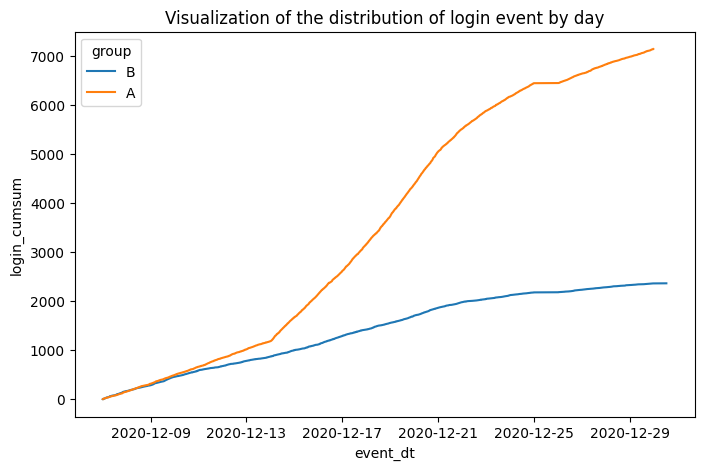

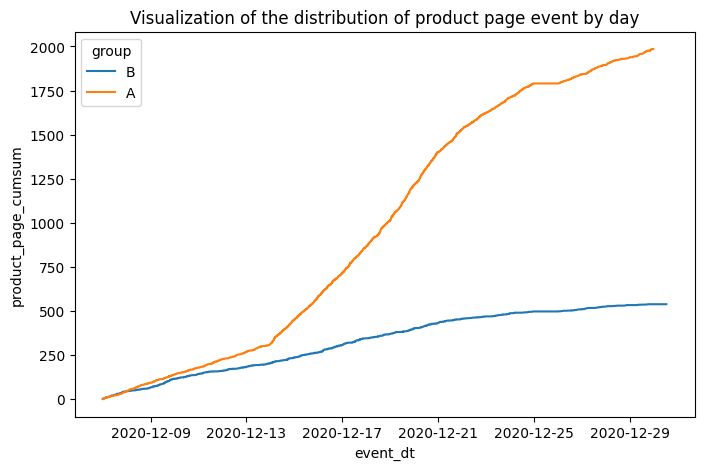

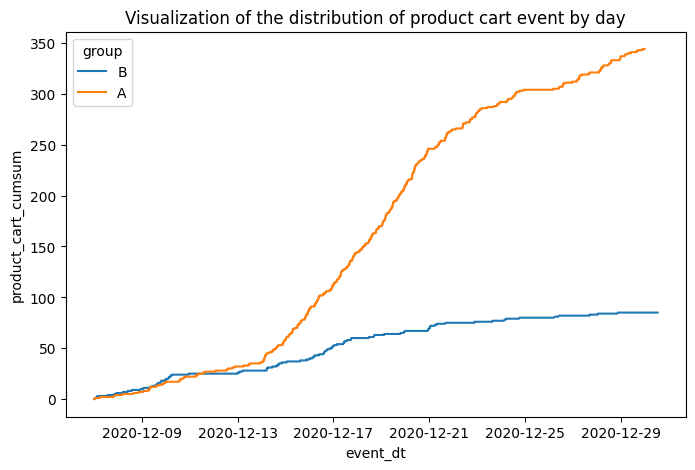

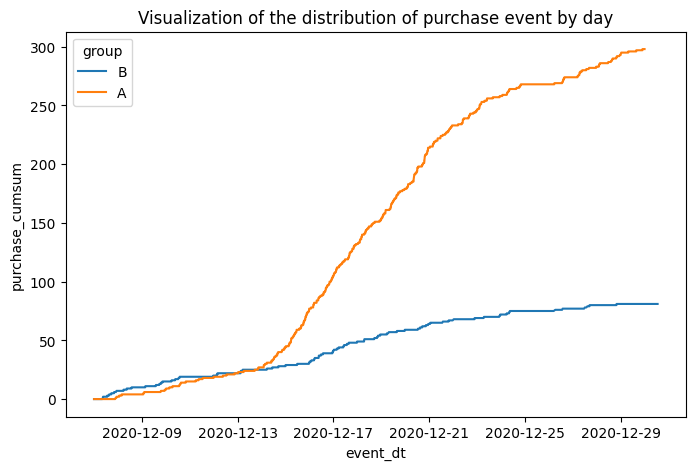

In [ ]:
# Figure out tthe number of events distributed by day using lineplot

plt.figure(figsize=(8,5))
sns.lineplot(data=event_cumulative, x='event_dt', y='login_cumsum', hue='group')
plt.title('Visualization of the distribution of login event by day');

plt.figure(figsize=(8,5))
sns.lineplot(data=event_cumulative, x='event_dt', y='product_page_cumsum', hue='group')
plt.title('Visualization of the distribution of product page event by day');

plt.figure(figsize=(8,5))
sns.lineplot(data=event_cumulative, x='event_dt', y='product_cart_cumsum', hue='group')
plt.title('Visualization of the distribution of product cart event by day');

plt.figure(figsize=(8,5))
sns.lineplot(data=event_cumulative, x='event_dt', y='purchase_cumsum', hue='group')
plt.title('Visualization of the distribution of purchase event by day');


**Findings:**
- At the beginning of December, group A and B were in almost the same position.
- In the mid of December, group A took the lead and held on until the end of the test.

**Insight:**
- Group A generates more events than group B.
- This may be because the number of users in group A is far higher than in group B (2330 users vs. 834 users)

**Assumption:**
- It can be assumed that the hypothesis test in group B has no effect on the increase in events because there are only a few users.

### Does your data have any special characteristics that should be considered before starting A/B testing ?


In [ ]:
# Total events of each group

agg_events

,event_name,total
0,login_event,9493
1,product_page_event,2523
2,product_cart_event,429
3,purchase_event,379


In [ ]:
# Look at the table of dist_user_per_group

dist_user_per_group

group,A,B,total,%A,%B
log_ev_user,2328,833,3161,0.736476,0.263524
prod_page_ev_user,1175,345,1520,0.773026,0.226974
prod_cart_ev_user,258,67,325,0.793846,0.206154
purc_ev_user,183,48,231,0.792208,0.207792


**Conclusions:**
- No of users in group B as the test group is only 834 users compared to the control group A of 2330 users.
- No of events in group B as the test group is only 2364 events compared to the control group A of 7142 users.
- That's why it can be assumed that the hypothesis test in group B has no effect on the increase in events because there are only a few users/events.

## A/B Testing

1. What can you say about the results of A/B testing ?
2. Use the z-test to test for statistical differences between the proportions.

### The significance level / "alpha" value = 0.01

In [ ]:
# Look at the dist_user_per_group table

dist_user_per_group

group,A,B,total,%A,%B
log_ev_user,2328,833,3161,0.736476,0.263524
prod_page_ev_user,1175,345,1520,0.773026,0.226974
prod_cart_ev_user,258,67,325,0.793846,0.206154
purc_ev_user,183,48,231,0.792208,0.207792


In [ ]:
# Look at the total_user_per_group table

total_user_per_group

,total_users
A,2328
B,833


**Formulation of Hypothesis testing**

- The significance level / "alpha" value to be used = 0.01
- We will use the Z-Test Statistics approach.
- Ho = The proportion between group samples was statistically the same (=)
- H1 = The proportion between group samples was statistically significant not the same (/=)

In [ ]:
# Define a formula for check a statistically significant difference between group samples

def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01):
    # proportion of successes in the first group:
    p1 = successes1/trials1

    # proportion of successes in the second group:
    p2 = successes2/trials2

    # proportion of successes in the combined dataset:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # difference in proportions in datasets
    difference = p1 - p2

    # calculate statistics in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # set standard normal distribution (mean 0, standard deviation 1)
    distr = stats.norm(0, 1)

    # calculate statistics in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject the null hypothesis: there is a significant difference between the shares")
    else:
        print("Failed to reject the null hypothesis, there is no reason to consider the shares different")

In [ ]:
# Statistic test of samples A and B

check_hypothesis(dist_user_per_group.loc['prod_page_ev_user', 'A'],
                 dist_user_per_group.loc['prod_page_ev_user', 'B'],
                 total_user_per_group.loc['A'],
                 total_user_per_group.loc['B'],
                )

p-value:  [7.14397324e-06]
Reject the null hypothesis: there is a significant difference between the shares


In [ ]:
# Define a formula for check a statistically significant difference between event of each group samples

def check_event_hypothesis(dist_user_per_group, total_user_per_group, event_name, exp1, exp2):
    frac1 = dist_user_per_group.loc[event_name, exp1] / total_user_per_group.loc[exp1]
    frac2 = dist_user_per_group.loc[event_name, exp2] / total_user_per_group.loc[exp2]
    print (f'{frac1} event {event_name} group {exp1}')
    print (f'{frac2} event {event_name} group {exp2}')
    check_hypothesis(dist_user_per_group.loc[event_name, exp1],
                     dist_user_per_group.loc[event_name, exp2],
                     total_user_per_group.loc[exp1],
                     total_user_per_group.loc[exp2],
                    )

In [ ]:
# Calculate a statistically significant difference between event of each group samples

for event_name in dist_user_per_group.index:
    check_event_hypothesis(dist_user_per_group, total_user_per_group,
                           event_name, 'A', 'B')
    print()

total_users    1.0
Name: A, dtype: float64 event log_ev_user group A
total_users    1.0
Name: B, dtype: float64 event log_ev_user group B
p-value:  [nan]
Failed to reject the null hypothesis, there is no reason to consider the shares different

total_users    0.504725
Name: A, dtype: float64 event prod_page_ev_user group A
total_users    0.414166
Name: B, dtype: float64 event prod_page_ev_user group B
p-value:  [7.14397324e-06]
Reject the null hypothesis: there is a significant difference between the shares

total_users    0.110825
Name: A, dtype: float64 event prod_cart_ev_user group A
total_users    0.080432
Name: B, dtype: float64 event prod_cart_ev_user group B
p-value:  [0.01319151]
Failed to reject the null hypothesis, there is no reason to consider the shares different

total_users    0.078608
Name: A, dtype: float64 event purc_ev_user group A
total_users    0.057623
Name: B, dtype: float64 event purc_ev_user group B
p-value:  [0.04581447]
Failed to reject the null hypothesis, t

**Conclusion:**
- Based on hypothesis testing above, with the significance level / "alpha" value to be used = 0.01, the result is failed to reject the null hypothesis, means there is no statistically significant shares difference between group samples A and B, except for the event of product_page.

### The significance level / "alpha" value = 0.05

**Formulation of Hypothesis testing**

- The significance level / "alpha" value to be used = 0.05
- We will use the Z-Test Statistics approach.
- Ho = The proportion between group samples was statistically the same (=)
- H1 = The proportion between group samples was statistically significant not the same (/=)

In [ ]:
# Define a formula for check a statistically significant difference between group samples

def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.05):
    # proportion of successes in the first group:
    p1 = successes1/trials1

    # proportion of successes in the second group:
    p2 = successes2/trials2

    # proportion of successes in the combined dataset:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # difference in proportions in datasets
    difference = p1 - p2

    # calculate statistics in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # set standard normal distribution (mean 0, standard deviation 1)
    distr = stats.norm(0, 1)

    # calculate statistics in standard deviations of the standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject the null hypothesis: there is a significant difference between the shares")
    else:
        print("Failed to reject the null hypothesis, there is no reason to consider the shares different")

In [ ]:
# Define a formula for check a statistically significant difference between event of each group samples

def check_event_hypothesis(dist_user_per_group, total_user_per_group, event_name, exp1, exp2):
    frac1 = dist_user_per_group.loc[event_name, exp1] / total_user_per_group.loc[exp1]
    frac2 = dist_user_per_group.loc[event_name, exp2] / total_user_per_group.loc[exp2]
    print (f'{frac1} event {event_name} group {exp1}')
    print (f'{frac2} event {event_name} group {exp2}')
    check_hypothesis(dist_user_per_group.loc[event_name, exp1],
                     dist_user_per_group.loc[event_name, exp2],
                     total_user_per_group.loc[exp1],
                     total_user_per_group.loc[exp2],
                    )

In [ ]:
# Calculate a statistically significant difference between event of each group samples

for event_name in dist_user_per_group.index:
    check_event_hypothesis(dist_user_per_group, total_user_per_group,
                           event_name, 'A', 'B')
    print()

total_users    1.0
Name: A, dtype: float64 event log_ev_user group A
total_users    1.0
Name: B, dtype: float64 event log_ev_user group B
p-value:  [nan]
Failed to reject the null hypothesis, there is no reason to consider the shares different

total_users    0.504725
Name: A, dtype: float64 event prod_page_ev_user group A
total_users    0.414166
Name: B, dtype: float64 event prod_page_ev_user group B
p-value:  [7.14397324e-06]
Reject the null hypothesis: there is a significant difference between the shares

total_users    0.110825
Name: A, dtype: float64 event prod_cart_ev_user group A
total_users    0.080432
Name: B, dtype: float64 event prod_cart_ev_user group B
p-value:  [0.01319151]
Reject the null hypothesis: there is a significant difference between the shares

total_users    0.078608
Name: A, dtype: float64 event purc_ev_user group A
total_users    0.057623
Name: B, dtype: float64 event purc_ev_user group B
p-value:  [0.04581447]
Reject the null hypothesis: there is a significa

**Conclusion:**
- Based on hypothesis testing above, with the significance level / "alpha" value to be used = 0.05, the results is reject the null hypothesis, means there is a significant difference between the shares of group samples A and B, except for the event of login.

## Overall Conclusion & Recommendations

**In the Data Pra-processing Section:**

- We have three datasets as follows:
    - `df_user` amounted **58703** rows and **4** columns
    - `df_event` amounted **423761** rows and **4** columns
    - `df_participant` amounted **14525** rows and **3** columns
        - Group A (control) = 8214 participant
        - Group B (new payment funnel) = 6311 participant -> which exceeds our expected number of experiment participants of 6000.
- In the first DataFrame, there are users who sign up on the dates 21-23 Dec while for this testing the date company stopped accepting new users is 2020-12-21. Then, in the EDA section, we will take out them.
- In the third DataFrame, `df_participant`, there are two type of `ab_test`: `interface_eu_test` and `recommender_system_test`. Our purpose of this A/B testing is for `recommender_system_test` experiment, then we remove the `interface_eu_test` with create a new table of `df_participant_filt`.
- There is no anomalies data.
- There is missing values in the column of `details` - `df_event` of 363447 rows (86% of the whole the `df_event` table). The `details` column contains additional data on the event (for instance, the order total in USD for purchase events). We can assume if the column contains NaN equal to there is no additional data, then we replaced the value with the null value.
- There is no duplicate data.

**In the EDA Section:**

- We assume that the funnel flow are `login` -> `product_page` -> `'product_cart` -> `purchase`.
- From the origin table, the total events in `purchase` is higher than `product_cart` (2789 vs. 2787).
- To overcome this, we will use **Closed Funnel** approach in the following step, which shows sequential flow funnels in one period. Funnels are not counted if they do not start from the first page (`login` event).
    - By the **Closed Funnel** approach, we know that from 9506 `login` events, only 2524 continue to the `product_page`, 429 events continue to the `'product_cart` and 379 events completed until the `purchase` stage.
    - We have 3164 users who has performed on event of login, with the detail as follows:
    - 1521 of users has performed on event of product_page.
    - 325 of users has performed on event of purchase.
    - 231 of users has performed on event of product_cart.
- The percentage of users who make the entire journey from the first event to the checkout stage is 7.3% (3163 users vs. 231 users).
- There are no users double in both samples. The average distribution of events per user is 77.3% in group A and 22.6% in group B. It's evenly distributed of each event, with the total `group_a` is 2330 users and `group_b` is 834 users.
- From the distribution by day, at the beginning of December, group A and B were in almost the same position. In the mid of December, group A took the lead and held on until the end of the test. We can say that the group A generates more events than group B. This may be because the number of users in group A is far higher than in group B/ It can be assumed that the hypothesis test in group B has no effect on the increase in events because there are only a few users.

**In the A/B Testing Section:**
- The A/B testing was done two times, by the significance level / "alpha" value used = 0.01 and 0.05.
- We used the Z-Test Statistics approach.
- Ho = The proportion between group samples was statistically the same (=)
- H1 = The proportion between group samples was statistically significant not the same (/=)
- The results are different between "alpha" value = 0.01 and 0.05, as follows:
    - The significance level / "alpha" value used = 0.01
        - The result is failed to reject the null hypothesis, means there is no statistically significant shares difference between group samples A and B, except for the event of product_page.
    - The significance level / "alpha" value used = 0.05
        - The results is reject the null hypothesis, means there is a significant difference between the shares of group samples A and B, except for the event of login.
        
**Recommendations:**
- The difference of the A/B testing results for statistical differences between the proportions using Z-test "alpha" value = 0.01 (failed to reject the null hypothesis) and "alpha" value = 0.05 (reject the null hypothesis), means there is a possibility of a significant difference between the shares of group samples A and B. Because decreasing alpha from 0.05 to 0.01 makes it harder to reject the null hypothesis.
- From the above, we can assume that the hypothesis test in group B has no effect on the increase in events because there are only a few users in group B.
- It's better to increase the no of observation population and longer the experiment days to gain more convincing A/B testing results.

Link to the presentation:
https://drive.google.com/file/d/1SmGbxJZ0ViZtdd6iJlrnLItFPxm__7Un/view?usp=sharing